<a href="https://colab.research.google.com/github/k-acme/6th-Semester/blob/master/Simple_Auto_Encoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers


# this is the size of our encoded representations
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)



(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.6732 - val_loss: 0.6485
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.453

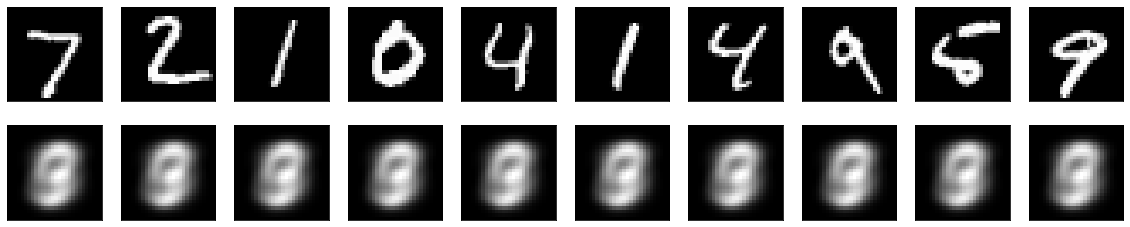

In [7]:
#Let's also create a separate encoder model:

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#As well as the decoder model:

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

#Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

#After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.11. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
